#  Прогнозирование заказов такси

Компания собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Тренд" data-toc-modified-id="Тренд-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренд</a></span></li><li><span><a href="#Сглаживание" data-toc-modified-id="Сглаживание-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сглаживание</a></span></li><li><span><a href="#Неделя" data-toc-modified-id="Неделя-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Неделя</a></span></li><li><span><a href="#День" data-toc-modified-id="День-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>День</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Стационарный-временной-ряд" data-toc-modified-id="Стационарный-временной-ряд-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Стационарный временной ряд</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Формирование-выборки" data-toc-modified-id="Формирование-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Формирование выборки</a></span></li><li><span><a href="#Формирование-выборки-по-стационарному-временному-ряду" data-toc-modified-id="Формирование-выборки-по-стационарному-временному-ряду-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Формирование выборки по стационарному временному ряду</a></span></li><li><span><a href="#Метрика-и-кросс-валидатор" data-toc-modified-id="Метрика-и-кросс-валидатор-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Метрика и кросс-валидатор</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#Подбор-наилучших-признаков-(отстающие-признаки,-скользящее-среднее)-на-примере-модели-Случайного-леса" data-toc-modified-id="Подбор-наилучших-признаков-(отстающие-признаки,-скользящее-среднее)-на-примере-модели-Случайного-леса-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Подбор наилучших признаков (отстающие признаки, скользящее среднее) на примере модели Случайного леса</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Dummy-model" data-toc-modified-id="Dummy-model-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Dummy model</a></span></li><li><span><a href="#Валидация-моделей-на-выборке-только-с-важными-признаками" data-toc-modified-id="Валидация-моделей-на-выборке-только-с-важными-признаками-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Валидация моделей на выборке только с важными признаками</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.10.1"><span class="toc-item-num">3.10.1&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.10.2"><span class="toc-item-num">3.10.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.10.3"><span class="toc-item-num">3.10.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.10.4"><span class="toc-item-num">3.10.4&nbsp;&nbsp;</span>LinearRegression</a></span></li></ul></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Итоги</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Dummy-model" data-toc-modified-id="Dummy-model-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Dummy model</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Итоги</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></li></ul></div>

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer

from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_val_score, cross_validate

Устанавливаем отображение до двух знаков после запятой и игнорирование предупреждений

In [2]:
pd.set_option('display.float_format','{:,.2f}'.format)

In [3]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

Загружаем данные

In [4]:
data_global = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
data_global.head()

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32

In [5]:
data_global.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Сортируем и семплируем по 1 часу

In [6]:
data_global.sort_index(axis='columns', ascending=True, inplace=True)
data_global.head(3)

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28

In [7]:
data_global = data_global.resample('1H').sum()
data_global.head(3)

num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71

## Анализ

In [8]:
data_global['num_orders'].value_counts()

73     65
66     58
57     58
78     54
84     52
       ..
210     1
214     1
238     1
242     1
295     1
Name: num_orders, Length: 251, dtype: int64

In [9]:
data_global['num_orders'].describe()

count   4,416.00
mean       84.42
std        45.02
min         0.00
25%        54.00
50%        78.00
75%       107.00
max       462.00
Name: num_orders, dtype: float64

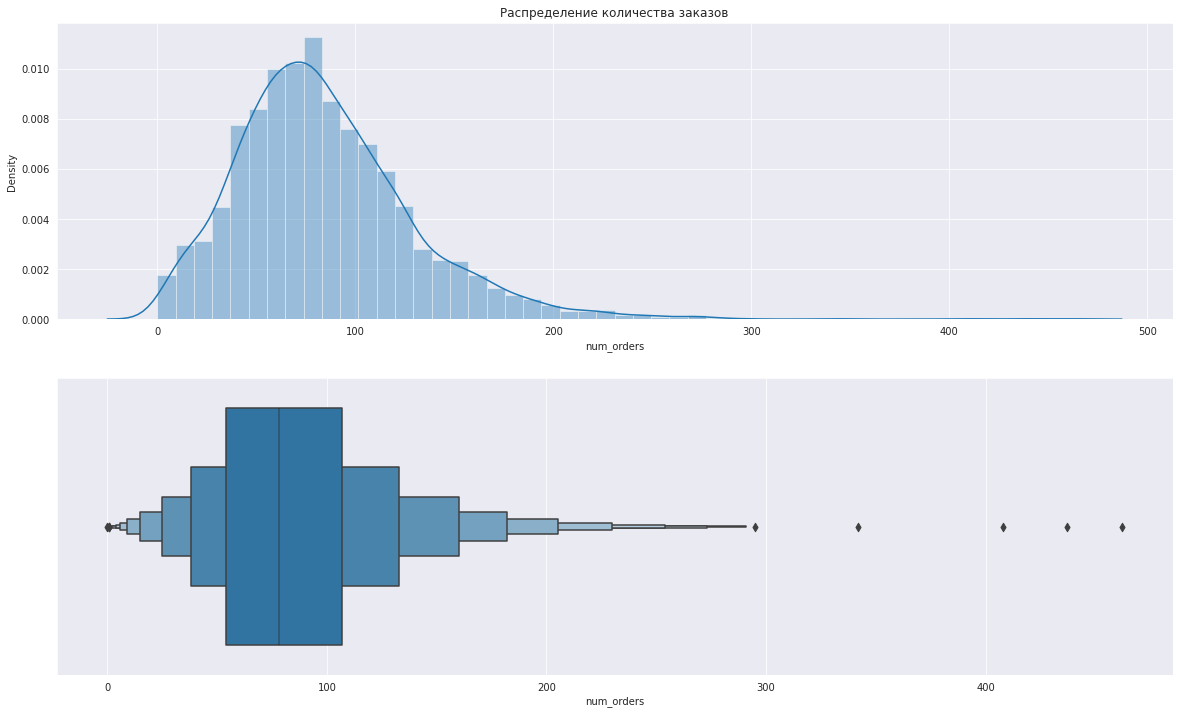

In [10]:
plt.figure(figsize=(20,12))
sns.set_style('darkgrid')


plt.subplot(211)
plt.title('Распределение количества заказов')
sns.distplot(data_global['num_orders'])

plt.subplot(212)
sns.boxenplot(data_global['num_orders'])

plt.show()

В целом, заказы распределены нормальным образом

### Тренд

Вычисляем тренды и сезонность.  
Количество заказов росло на протяжении всего временного ряда, наиболее выражено с июня 2018 года.  
Сезонность не выявлена

In [11]:
decomposed = seasonal_decompose(data_global)

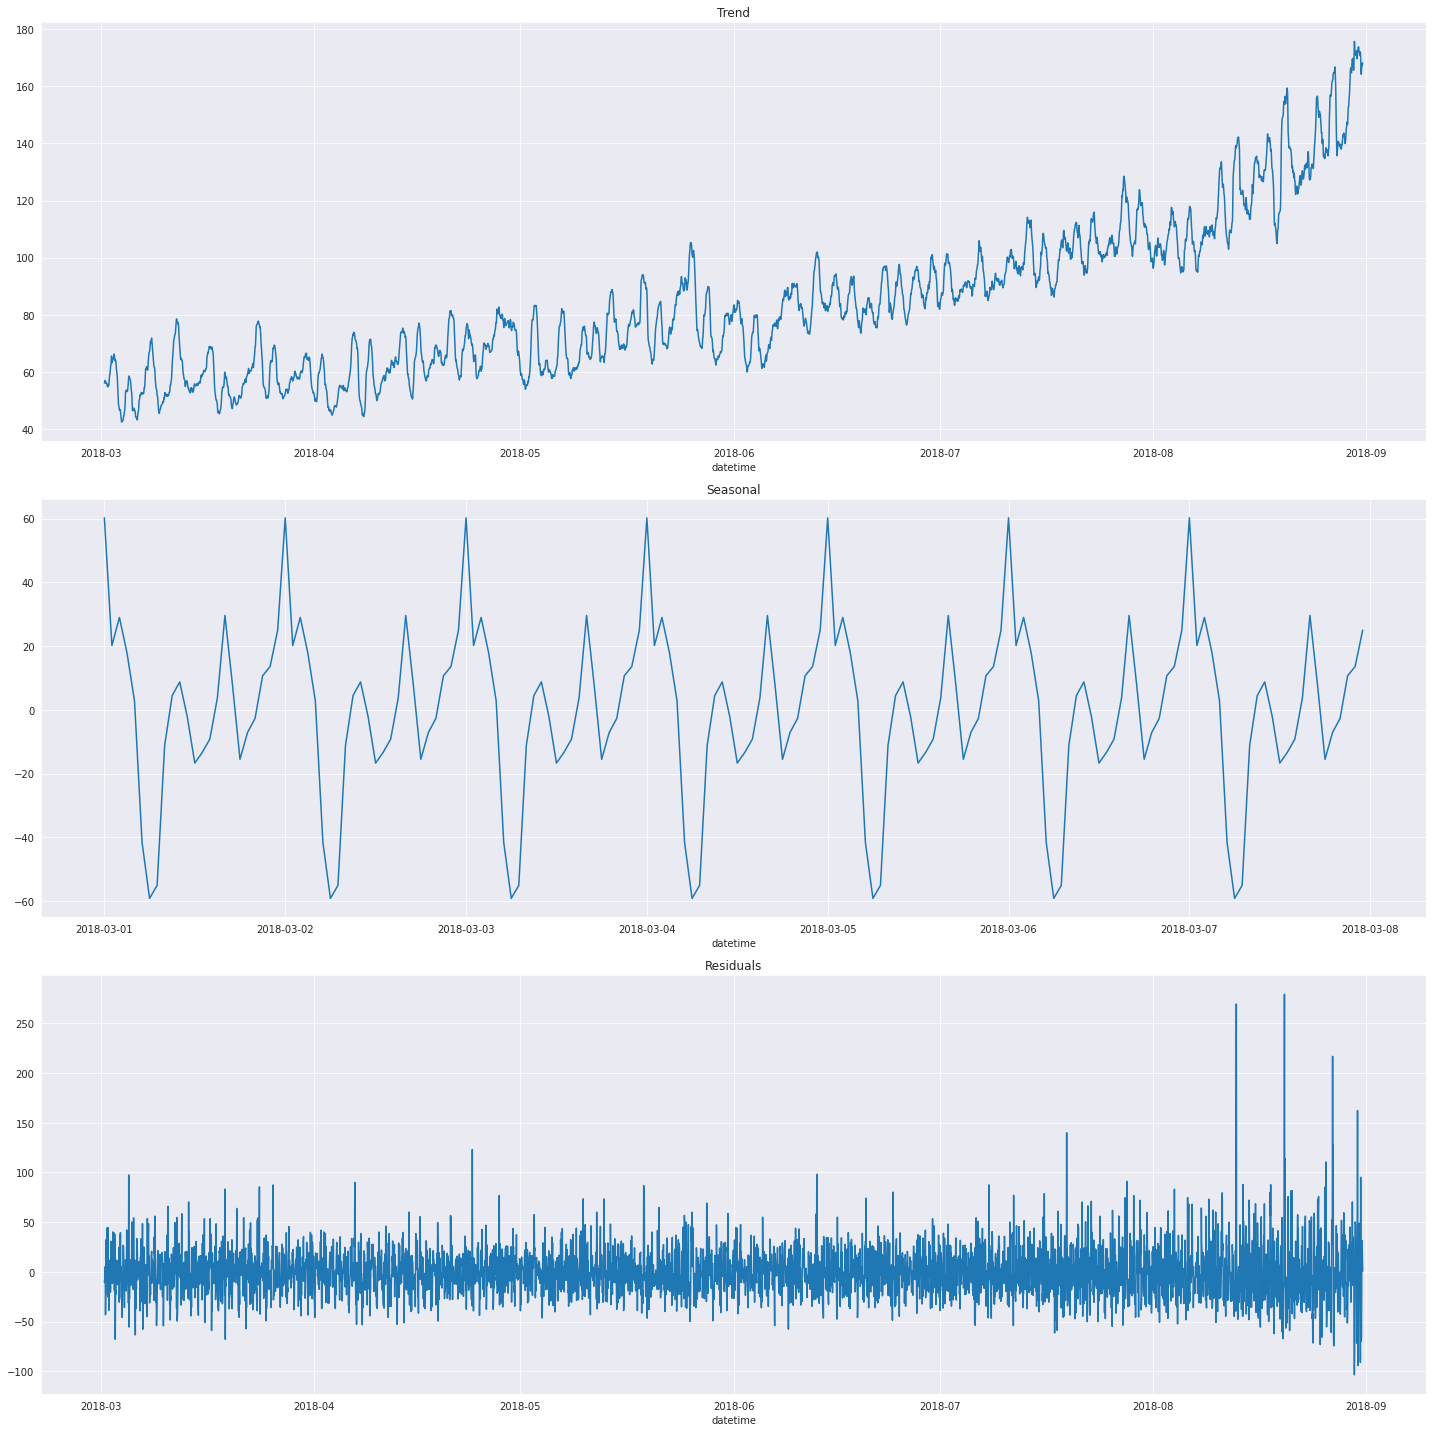

In [12]:
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')
plt.subplot(311)
sns.lineplot(x=decomposed.trend.index,
             y=decomposed.trend.values, 
             data=decomposed.trend)
plt.title('Trend')

plt.subplot(312)
sns.lineplot(
    x=decomposed.seasonal['2018-03-01':'2018-03-07'].index, 
    y=decomposed.seasonal['2018-03-01':'2018-03-07'].values, 
    data=decomposed.seasonal['2018-03-01':'2018-03-07'])
plt.title('Seasonal')

plt.subplot(313)
sns.lineplot(x=decomposed.resid.index, 
             y=decomposed.resid.values, 
             data=decomposed.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [13]:
df = data_global.copy(deep=True)
df.head()

num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43

### Сглаживание

Вычисляем скользящее среднее с окном 24 часа и стандартное отклонение по скользящему окну

In [14]:
df['rolling_mean'] = df.rolling(24).mean()

In [15]:
df['std'] = df['num_orders'].rolling(24).std()
df.head(3)

num_orders  rolling_mean  std
datetime                                          
2018-03-01 00:00:00         124           NaN  NaN
2018-03-01 01:00:00          85           NaN  NaN
2018-03-01 02:00:00          71           NaN  NaN

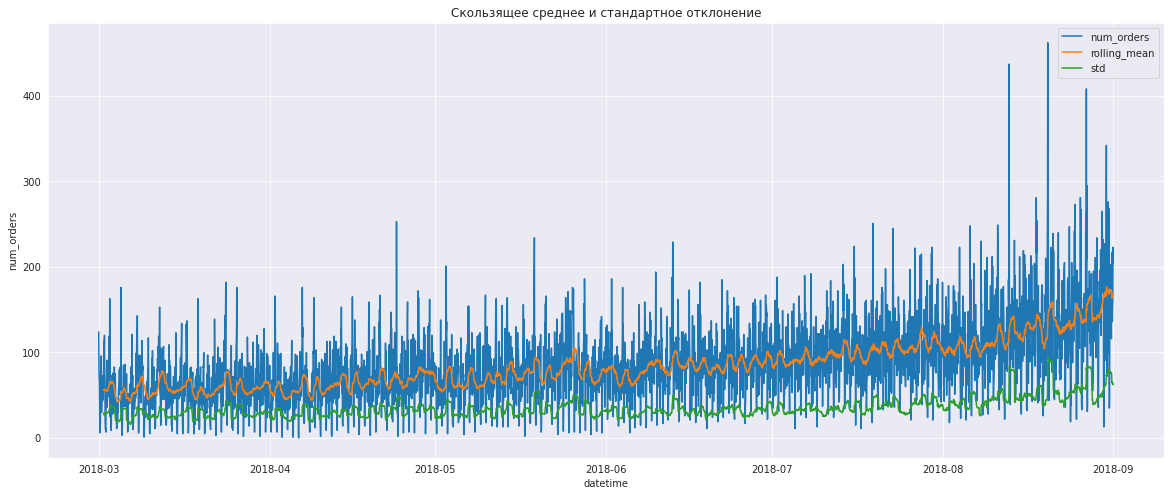

In [16]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.title('Скользящее среднее и стандартное отклонение')
sns.lineplot(x=df.index, y='num_orders', data=df)
sns.lineplot(x=df.index, y='rolling_mean', data=df)
sns.lineplot(x=df.index, y='std', data=df)
plt.legend(df.columns)
plt.ylabel('num_orders')

plt.show()

### Неделя

При проверке недельного временного ряда в начале выборки (после мартовских праздников) и в конце (в августе) видно, что наибольшее кол-во заказов приходится на понедельник в обеих выборках, еще на субботу в мартовской выборке.  
Среднее количество заказов в августе больше почти в два раза.

In [17]:
df_week_start = data_global['2018-03-18':'2018-03-25']
df_week_finish = data_global['2018-08-19':'2018-08-26']

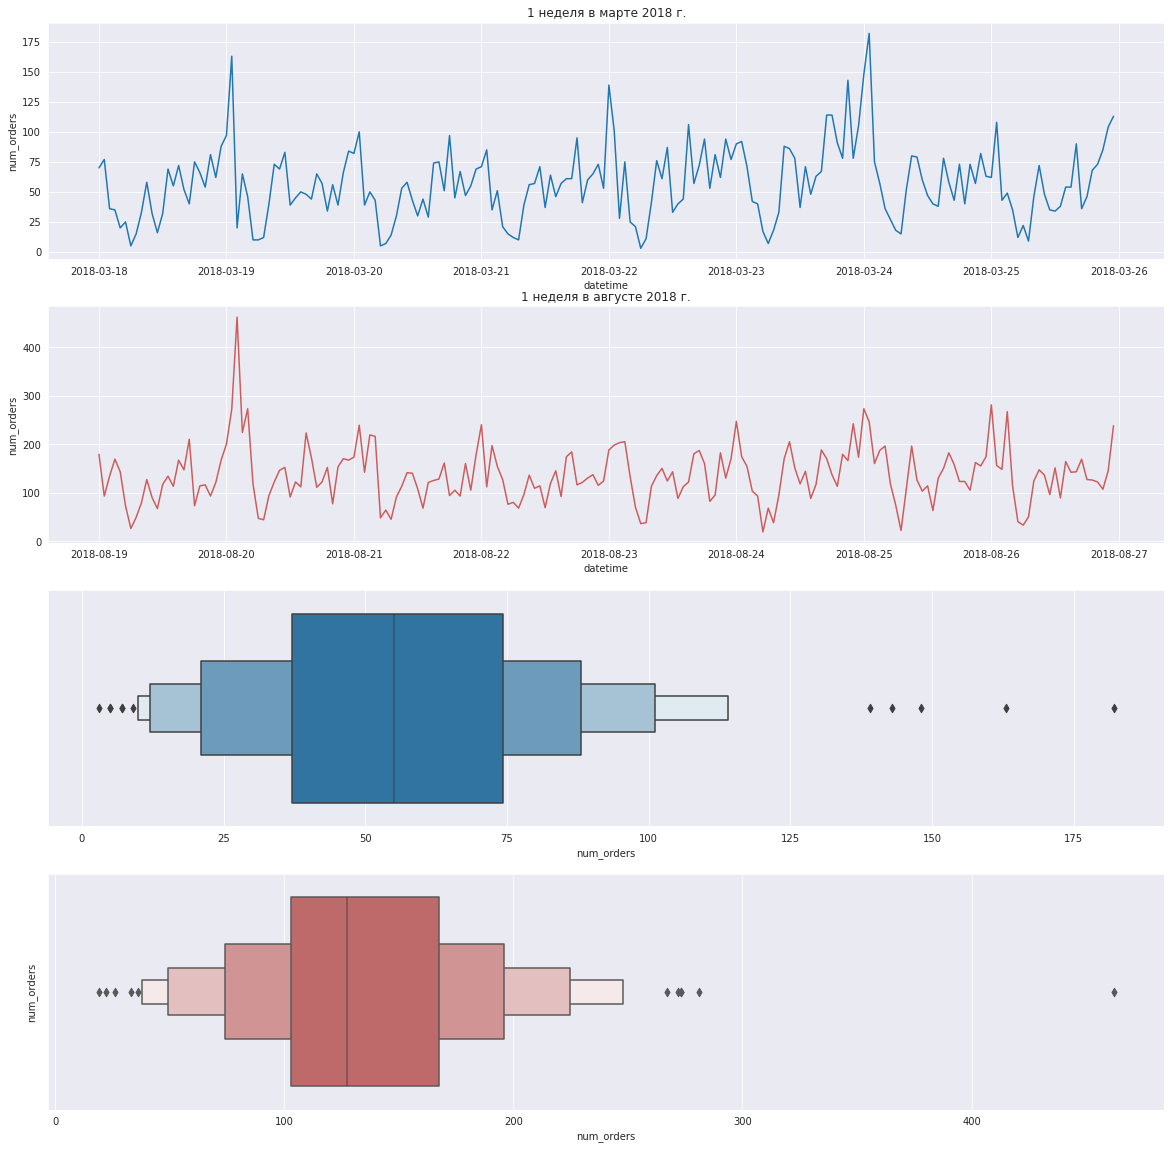

In [18]:
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')
plt.subplot(411)
plt.title('1 неделя в марте 2018 г.')
sns.lineplot(x=df_week_start.index, y='num_orders', data=df_week_start)

plt.subplot(412)
plt.title('1 неделя в августе 2018 г.')
sns.lineplot(x=df_week_finish.index, y='num_orders', data=df_week_finish, color='indianred')

plt.subplot(413)
sns.boxenplot(df_week_start['num_orders'])
plt.subplot(414)
sns.boxenplot(df_week_finish['num_orders'], color='indianred')

# plt.legend(df_1.columns)
plt.ylabel('num_orders')

plt.show()

### День

При проверке данных по выборке с 1 марта (четверг) и 30 августа (четверг) динамика кол-ва заказов схожа.  
С 12 часов ночи заказы уменьшаются, с 6 часов утра - увеличиваются.

In [19]:
df_start = data_global['2018-03-01':'2018-03-01']
df_finish = data_global['2018-08-30':'2018-08-30']

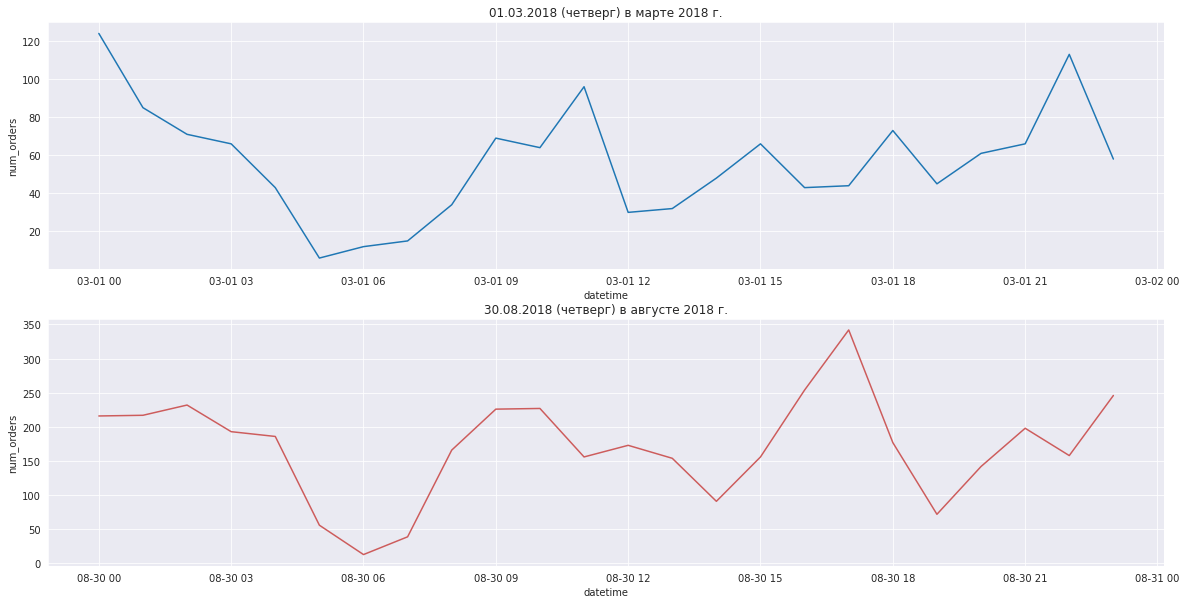

In [20]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.subplot(211)
plt.title('01.03.2018 (четверг) в марте 2018 г.')
sns.lineplot(x=df_start.index, y='num_orders', data=df_start)

plt.subplot(212)
plt.title('30.08.2018 (четверг) в августе 2018 г.')
sns.lineplot(x=df_finish.index, y='num_orders', data=df_finish, color='indianred')

# plt.legend(df_1.columns)
plt.ylabel('num_orders')

plt.show()

In [21]:
df_day = data_global.resample('1D').sum()

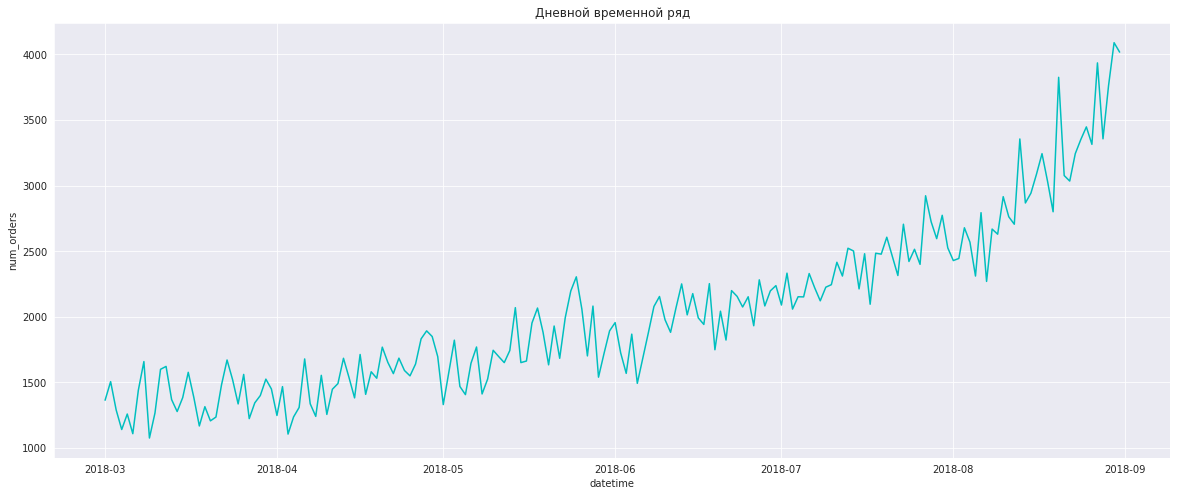

In [22]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.title('Дневной временной ряд')
sns.lineplot(x=df_day.index, y='num_orders', data=df_day, color='c')

plt.ylabel('num_orders')

plt.show()

### Создание признаков

Функция по формированию признаков и удалению пропусков:
- час, день, день недели, месяц
- отстающие признаки
- скользящее среднее

In [23]:
data = data_global.copy(deep=True)

In [24]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['month'] = data.index.month
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data.dropna(inplace=True)

Добавляем признаки в таблицу (12 часов смещение, 24 часа скользящее среднее)

In [25]:
make_features(data, 12, 24)

С воскресенья на понедельник заказы активно уменьшаются, с понедельника плавно растут до четверга, с четверга по субботу плавно падают

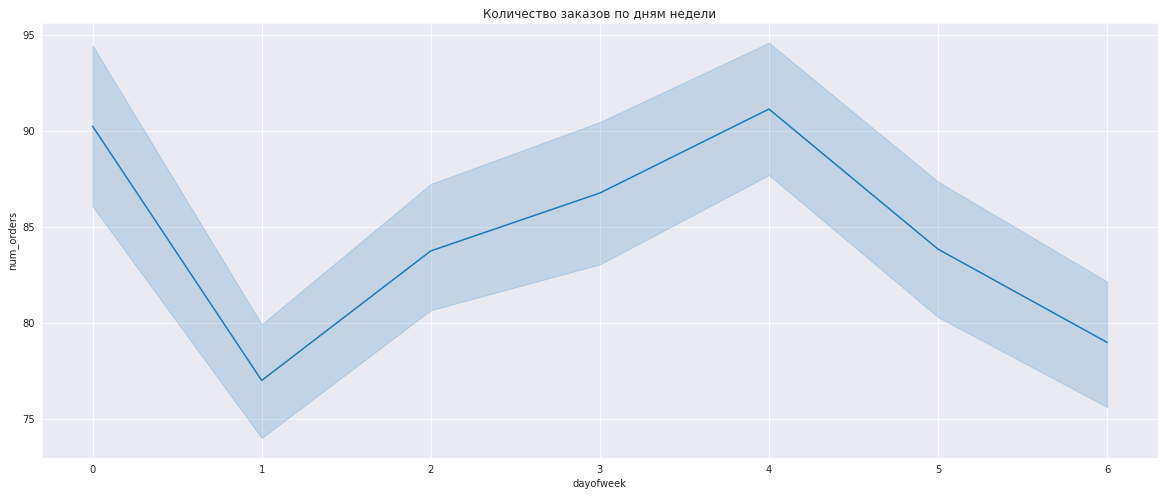

In [26]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')

plt.title('Количество заказов по дням недели')
sns.lineplot(x=data.dayofweek, y='num_orders', data=data)

plt.ylabel('num_orders')

plt.show()

Количество заказов с 0 часов ночи до 6 утра активно снижается, после чего заказы автивно растут до 10 утра и с 14 часов до 16 часов дня, далее снижение и вновь рост с 18 часов вечера

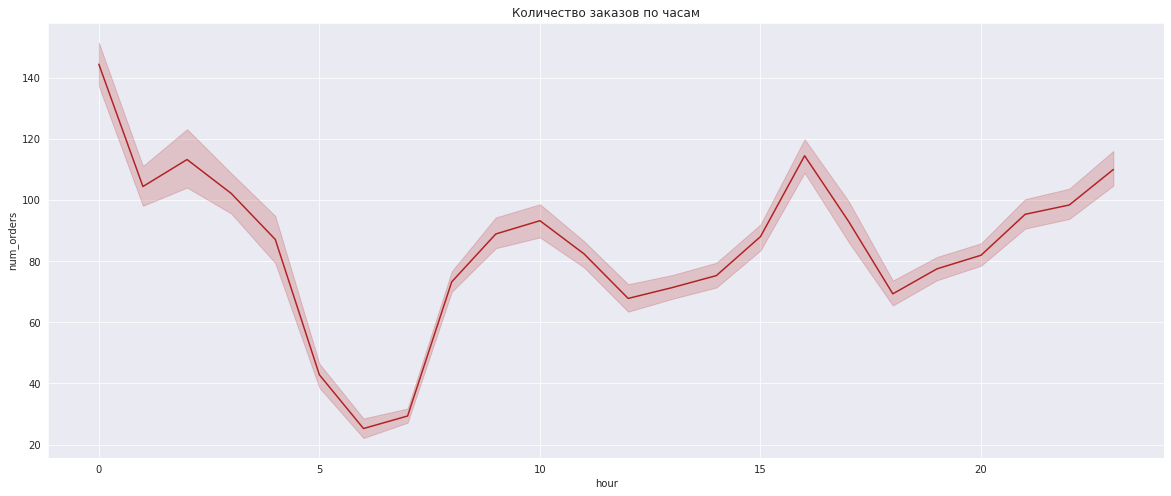

In [27]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')

plt.title('Количество заказов по часам')
sns.lineplot(x=data.hour, y='num_orders', data=data, color='firebrick')

plt.ylabel('num_orders')

plt.show()

### Стационарный временной ряд

Найдем разницу между соседними значениями временного ряда, чтобы привести его к виду стационарного временного ряда

In [28]:
data_shift = data.shift(fill_value = 0)
data_upd = data - data_shift

In [29]:
data_upd.isna().sum().sum()

0

In [30]:
data['num_orders'].describe()

count   4,392.00
mean       84.57
std        45.05
min         0.00
25%        54.00
50%        78.00
75%       108.00
max       462.00
Name: num_orders, dtype: float64

In [31]:
data_upd['num_orders'].describe()

count   4,392.00
mean        0.05
std        39.09
min      -269.00
25%       -22.00
50%         1.00
75%        23.00
max       193.00
Name: num_orders, dtype: float64

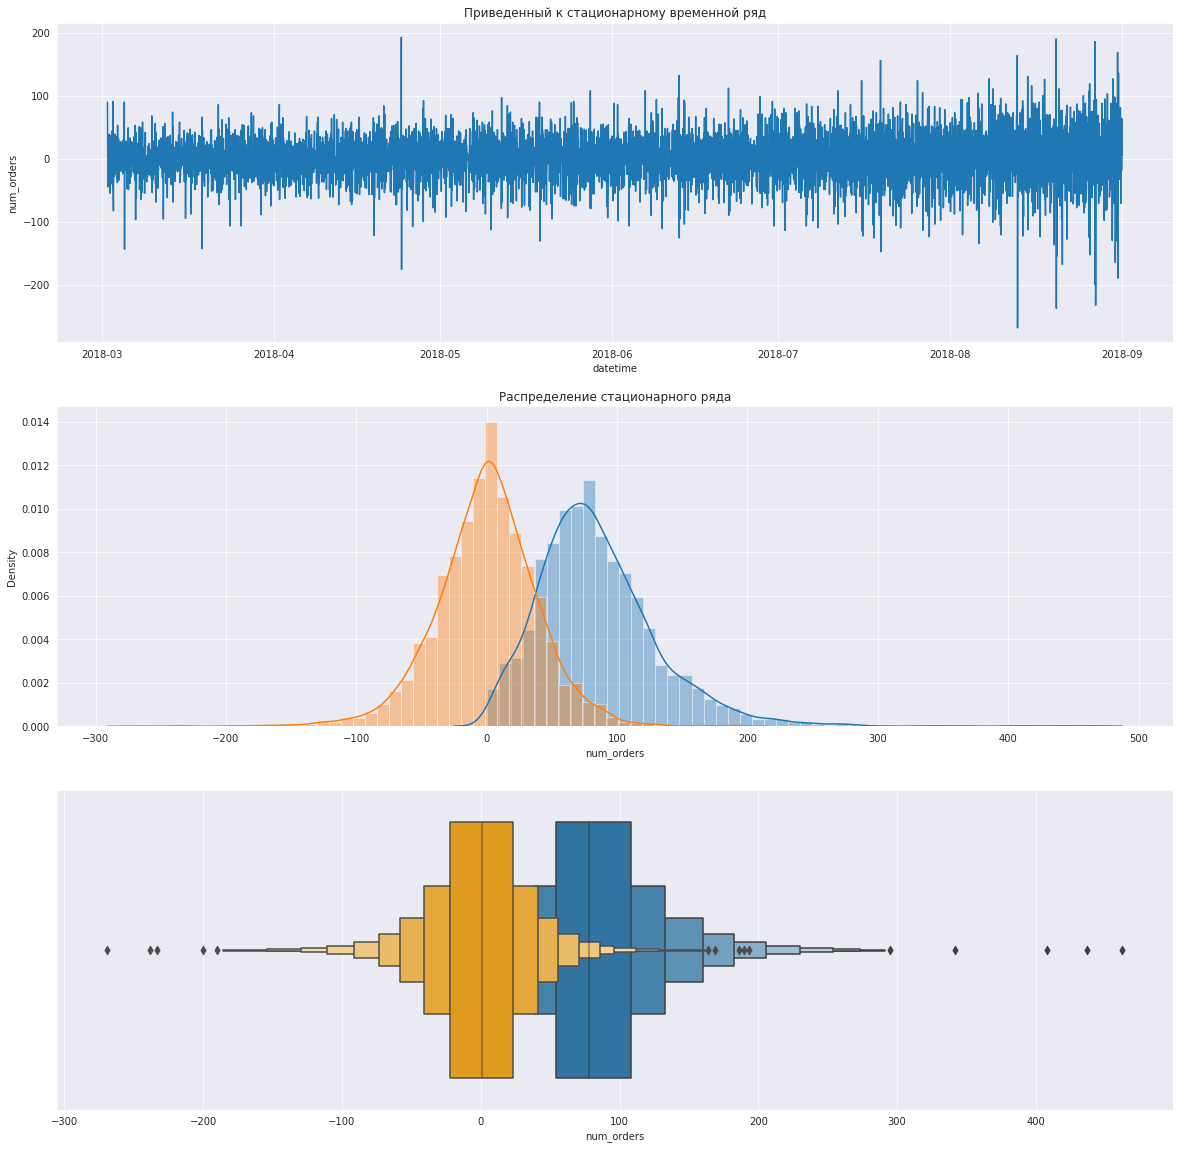

In [32]:
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')

plt.subplot(311)
plt.title('Приведенный к стационарному временной ряд')
sns.lineplot(x=data_upd.index, y='num_orders', data=data_upd)

plt.subplot(312)
plt.title('Распределение стационарного ряда')
sns.distplot(data['num_orders'])
sns.distplot(data_upd['num_orders'])

plt.subplot(313)
sns.boxenplot(data['num_orders'])
sns.boxenplot(data_upd['num_orders'], color='orange')

plt.show()

Распределение стало более похоже на нормальное

### Вывод:  
1. загрузили данные и выполнили семплирование по 1 часу
2. обнаружили тренд роста числа заказов на протяжении всего временного ряда, явно выражено с июня, максимальный рост в августе
3. сезоннность не обнаружена, так как временной ряд в рамках одного года
4. выполнили сглаживание скользящим средним с окном в 24 часа
5. выявили зависимость количества заказов от дня недели: активное снижение заказов с вечера воскресенья до утра понедельника (вероятно, прилеты в основной массе вечером в воскресенье до 24 часов - [Прилет 09/01 Домодедово](https://www.dme.ru/book/live-board/?searchText=&column=4&sort=1&start=4140&end=4380&direction=A&page=1&count=&isSlider=1)), а также рост с понедельника по четверг (видимо, в это время активно выполняются регулярные рейсы, которыми пользуются люди по работе)
6. также обнаружена зависимость кол-ва заказов от времени суток: сильное снижение заказов с 0 часов до 6 утра, затем сильный рост до 10 часов утра (блок утренних рейсов), затем рост с 14 часов до 16 (блок вечерних рейсов) и плавный рост с 18 до 24 часов (вероятнее всего это уже прилеты)
7. написали функцию по созданию признаков
8. постарались привести наш временной ряд к виду стационарного временного ряда с помощью нахождения разниц между соседними значениями

## Обучение

### Формирование выборки

In [33]:
features = data.drop('num_orders', axis='columns')
target = data['num_orders']

In [34]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, shuffle=False, test_size=0.1
)

In [35]:
print(features_train.shape)
print(features_test.shape)
print()
print(target_train.shape)
print(target_test.shape)

(3952, 17)
(440, 17)

(3952,)
(440,)


In [36]:
print(features_train.index.max())
print(features_test.index.min())

2018-08-13 15:00:00
2018-08-13 16:00:00


### Формирование выборки по стационарному временному ряду

In [37]:
features_shift = data_upd.drop('num_orders', axis='columns')
target_shift = data_upd['num_orders']

In [38]:
features_train_shift, features_test_shift, target_train_shift, target_test_shift = train_test_split(
    features_shift, target_shift, shuffle=False, test_size=0.1
)

In [39]:
features_train_shift.shape

(3952, 17)

### Метрика и кросс-валидатор

In [40]:
my_cv = TimeSeriesSplit(n_splits=3)

Функция для удобства расчета метрики

In [41]:
def rmse(target, predictions):
    rmse = np.sqrt(mean_squared_error(target, predictions))
    return rmse

In [42]:
my_scorer = make_scorer(rmse, greater_is_better=False)

Функция по построению таблицы и графика важности признаков модели

In [43]:
def importance(model, features_train, model_name):
    if model_name != 'LinearRegression':
        importances = model.feature_importances_
    else:
        importances = model.coef_
    feature_list = list(features_train.columns)
    feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

    feature_results = feature_results.sort_values('importance', ascending=False).reset_index(drop=True)
    display(feature_results.head())

    plt.figure(figsize=(25,6))
    sns.set_style('darkgrid')
    sns.barplot(x='feature', y='importance', data=feature_results)
    plt.title('Важность признаков модели '+ model_name)

    plt.show()

### RandomForestRegressor

In [44]:
model = RandomForestRegressor()
parametrs = {
    'n_estimators': [50, 180, 300],
    'max_depth' : [10, 20, 30],
    'random_state' : [12345],
    'oob_score' : ['True'],
#     'max_features' : [5, 10]
#     'min_samples_leaf' : [5]
}
grid_forest = GridSearchCV(model, parametrs, cv=my_cv, scoring=my_scorer)

In [45]:
grid_forest.fit(features_train_shift, np.cumsum(target_train_shift))
print(grid_forest.best_estimator_)
print('RandomForestRegressor (shift): RMSE = {:.2f}'.format(grid_forest.best_score_* (-1)))

RandomForestRegressor(max_depth=30, n_estimators=300, oob_score='True',
                      random_state=12345)
RandomForestRegressor (shift): RMSE = 35.64


In [46]:
grid_forest.fit(features_train, target_train)
print(grid_forest.best_estimator_)
rmse_RF = grid_forest.best_score_* (-1)
print('RandomForestRegressor : RMSE = {:.2f}'.format(rmse_RF))

RandomForestRegressor(max_depth=20, n_estimators=300, oob_score='True',
                      random_state=12345)
RandomForestRegressor : RMSE = 26.55


На стационарном временном ряду метрика хуже

### Подбор наилучших признаков (отстающие признаки, скользящее среднее) на примере модели Случайного леса

In [47]:
data_search = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
data_search.sort_index(axis='columns', ascending=True, inplace=True)
data_search = data_search.resample('1H').sum()
data_search.head(3)

num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71

In [48]:
best_lag = 0
best_roll = 0
best_result = 100

best_features_train = None
best_features_test = None
best_target_train = None
best_target_test = None

df_search = data_search


for lag in range(11, 25, 5):
    for roll in range (12, 25, 6):
        make_features(df_search, lag, roll)
        
        features_bf = df_search.drop('num_orders', axis='columns')
        target_bf = df_search['num_orders']
        
        features_train_bf, features_test_bf, target_train_bf, target_test_bf = train_test_split(
        features, target, shuffle=False, test_size=0.1)
        
        score_val = cross_val_score(
            grid_forest.best_estimator_,
            features_train_bf,
            target_train_bf,
            scoring=my_scorer,
            cv=my_cv)
        result = pd.Series(score_val).mean()
        
        if result < best_result:
            best_result = result
            best_lag = lag
            best_roll = roll
            
            best_features_train = features_train_bf
            best_features_test = features_test_bf
            best_target_train = target_train_bf
            best_target_test = target_test_bf        
            
        df_search = data_search

print('Best result: RMSE = {:.2f}'.format(best_result * (-1)))
print(f'best lag: {best_lag}')
print(f'best roll: {best_roll}')       

Best result: RMSE = 26.55
best lag: 11
best roll: 12


При подборе признаков значение метрики не изменилось

feature  importance
0         lag_1        0.26
1          hour        0.24
2  rolling_mean        0.10
3         lag_7        0.05
4        lag_12        0.04

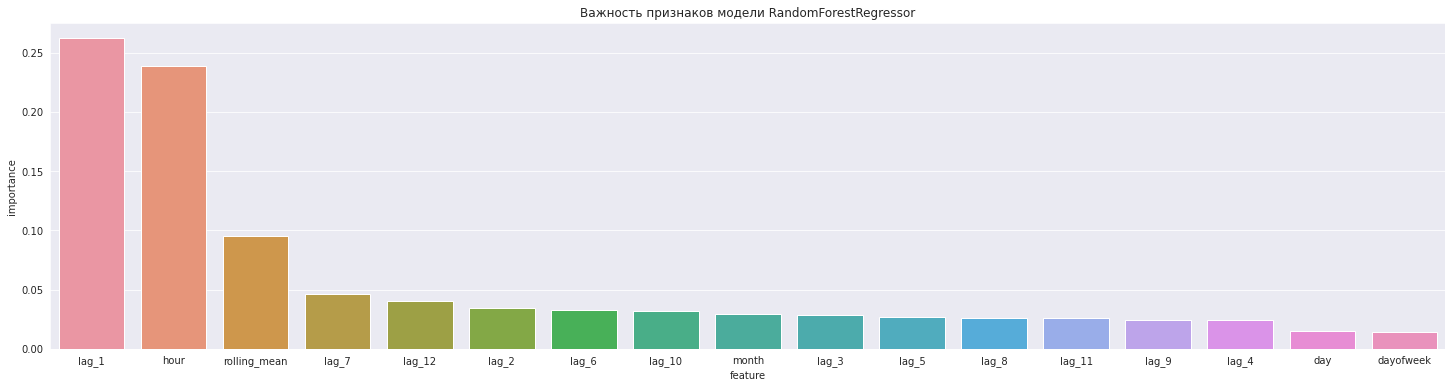

In [49]:
importance(grid_forest.best_estimator_, features_train, 'RandomForestRegressor')

Предсказания модели RandomForestRegressor в большей мере основываются на значении предыдущего часа и часа в разрезе суток, в меньшей мере на скользящем среднем значении

### CatBoostRegressor

In [50]:
model = CatBoostRegressor(loss_function="RMSE", verbose=100)
parametrs = {
    'iterations': [70, 200],
    'depth' : [8, 12],
    'grow_policy' : ['SymmetricTree', 'Lossguide']
}
grid_CBR = GridSearchCV(model, parametrs, cv=my_cv, scoring=my_scorer)

In [51]:
grid_CBR.fit(features_train, target_train)
print(grid_CBR.best_estimator_)

rmse_CBR = grid_CBR.best_score_* (-1)
print('CatBoostRegressor : RMSE = {:.2f}'.format(rmse_CBR))

Learning rate set to 0.355047
0:	learn: 25.6416845	total: 60ms	remaining: 4.14s
69:	learn: 4.4097247	total: 627ms	remaining: 0us
Learning rate set to 0.39614
0:	learn: 27.4233133	total: 13.3ms	remaining: 916ms
69:	learn: 7.0534846	total: 663ms	remaining: 0us
Learning rate set to 0.422349
0:	learn: 27.6206905	total: 14.2ms	remaining: 979ms
69:	learn: 9.3974024	total: 764ms	remaining: 0us
Learning rate set to 0.151222
0:	learn: 27.6676745	total: 9.13ms	remaining: 1.82s
100:	learn: 6.9267553	total: 811ms	remaining: 795ms
199:	learn: 3.3622359	total: 1.6s	remaining: 0us
Learning rate set to 0.168724
0:	learn: 29.9114662	total: 11.3ms	remaining: 2.25s
100:	learn: 10.0301328	total: 930ms	remaining: 912ms
199:	learn: 5.6194654	total: 1.85s	remaining: 0us
Learning rate set to 0.179887
0:	learn: 31.0194747	total: 12.8ms	remaining: 2.54s
100:	learn: 11.8582422	total: 1.09s	remaining: 1.06s
199:	learn: 7.7979012	total: 2.16s	remaining: 0us
Learning rate set to 0.355047
0:	learn: 24.7253311	total:

feature  importance
0          hour       30.58
1         lag_1       26.75
2  rolling_mean        8.32
3         month        4.89
4         lag_7        3.99

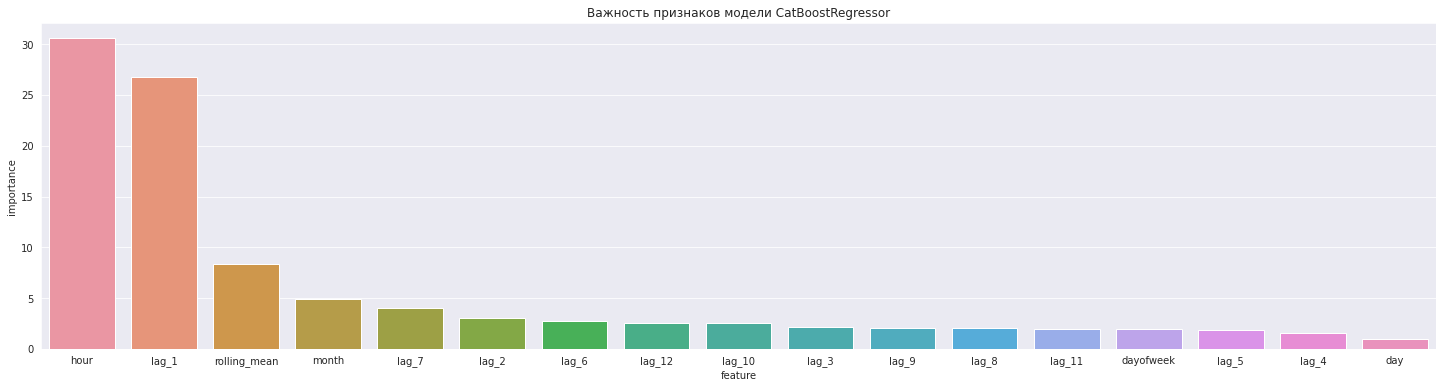

In [52]:
importance(grid_CBR.best_estimator_, features_train, 'CatBoostRegressor')

Предсказания модели CatBoostRegressor в большей мере основываются на значении часа в разрезе суток и на значении предыдущего часа, в меньшей мере на скользящем среднем значении

### LGBMRegressor

In [53]:
model = LGBMRegressor(metric="rmse")
parametrs = {
    'n_estimators': [100, 200],
    'max_depth' : [8, 12],
}
grid_LGBM = GridSearchCV(model, parametrs, cv=my_cv, scoring=my_scorer)

In [54]:
grid_LGBM.fit(features_train, target_train)
print(grid_LGBM.best_estimator_)

rmse_LGBM = grid_LGBM.best_score_* (-1)
print('LGBMRegressor : RMSE = {:.2f}'.format(rmse_LGBM))

LGBMRegressor(max_depth=12, metric='rmse')
LGBMRegressor : RMSE = 26.42


In [55]:
best_lag = 0
best_roll = 0
best_result = 100

best_features_train = None
best_features_test = None
best_target_train = None
best_target_test = None

df_search = data_search


for lag in range(11, 25, 5):
    for roll in range (12, 25, 6):
        make_features(df_search, lag, roll)
        
        features_bf = df_search.drop('num_orders', axis='columns')
        target_bf = df_search['num_orders']
        
        features_train_bf, features_test_bf, target_train_bf, target_test_bf = train_test_split(
        features, target, shuffle=False, test_size=0.1)
        
        
        score_val = cross_val_score(
            grid_LGBM.best_estimator_,
            features_train_bf,
            target_train_bf,
            scoring=my_scorer,
            cv=my_cv)
        result = pd.Series(score_val).mean()
        
        
        if result < best_result:
            best_result = result
            best_lag = lag
            best_roll = roll
            
            best_features_train = features_train_bf
            best_features_test = features_test_bf
            best_target_train = target_train_bf
            best_target_test = target_test_bf        
            
        df_search = data_search

print('Best result: RMSE = {:.2f}'.format(best_result * (-1)))
print(f'best lag: {best_lag}')
print(f'best roll: {best_roll}')       

Best result: RMSE = 26.42
best lag: 11
best roll: 12


feature  importance
0    hour         358
1   lag_1         231
2   lag_2         226
3   lag_3         197
4  lag_10         191

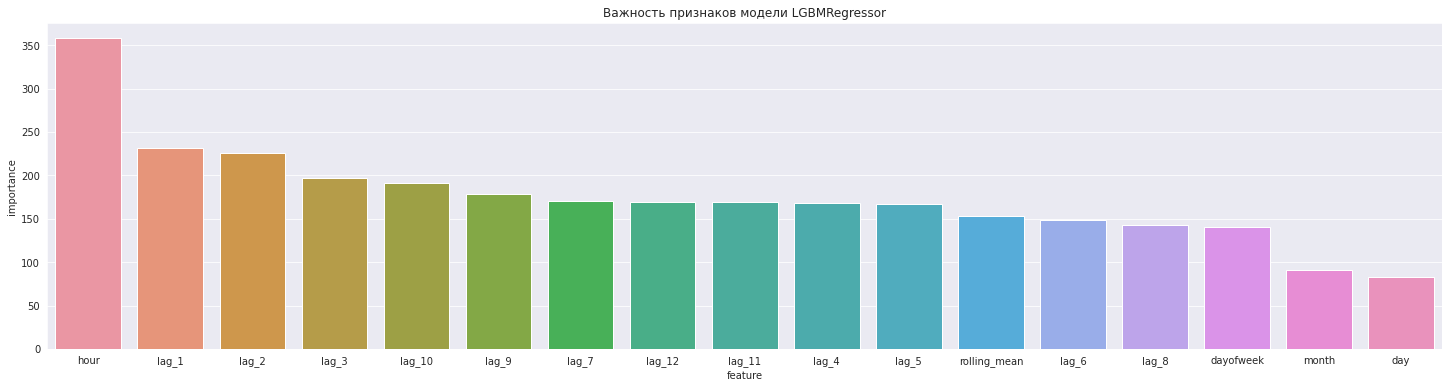

In [56]:
importance(grid_LGBM.best_estimator_, features_train, 'LGBMRegressor')

Предсказания модели LGBMRegressor основываются в большей мере на значении часа в разрезе суток, в остальном практически на всех признаках в равной мере

### LinearRegression

In [57]:
model = LinearRegression()
parametrs = {
    'fit_intercept': ['True', 'False'],
    'normalize' : ['True', 'False'],
}
grid_LR = GridSearchCV(model, parametrs, cv=my_cv, scoring=my_scorer)

In [58]:
grid_LR.fit(features_train_shift, np.cumsum(target_train_shift))
print(grid_LR.best_estimator_)

rmse_LR = grid_LR.best_score_* (-1)
print('LinearRegression (shift): RMSE = {:.2f}'.format(rmse_LR))

LinearRegression(fit_intercept='True', normalize='True')
LinearRegression (shift): RMSE = 38.04


In [59]:
grid_LR.fit(features_train, target_train)
print(grid_LR.best_estimator_)

rmse_LR = grid_LR.best_score_* (-1)
print('LinearRegression : RMSE = {:.2f}'.format(rmse_LR))

LinearRegression(fit_intercept='True', normalize='True')
LinearRegression : RMSE = 32.20


На стационарном временном ряду метрика хуже

feature  importance
0         month        4.86
1         lag_1        0.42
2  rolling_mean        0.32
3           day        0.24
4         lag_2        0.09

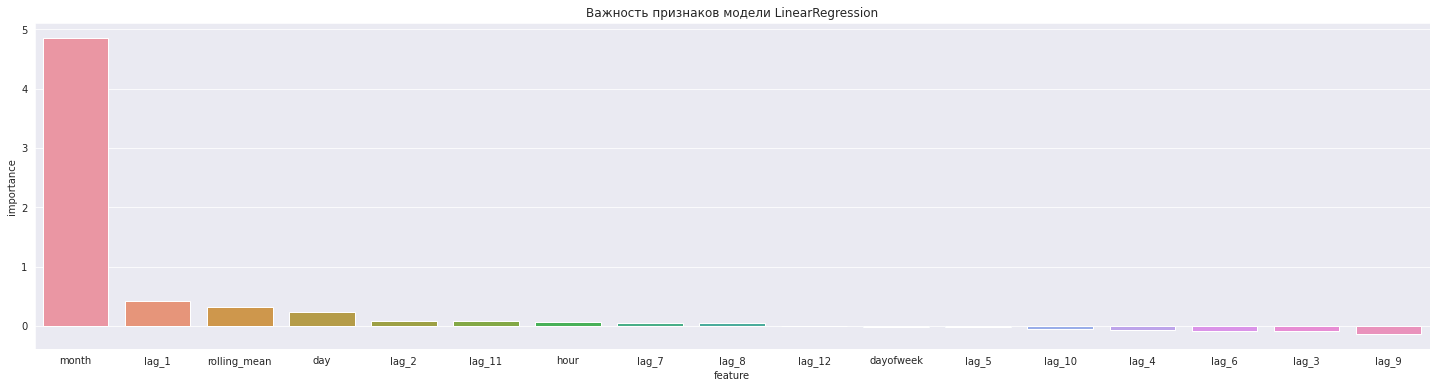

In [60]:
importance(grid_LR.best_estimator_, features_train, 'LinearRegression')

Предсказания модели LinearRegression основываются преимущественно на значени часа в разрезе суток, остальные признаки сильно менье значимы

### Dummy model

Для проверки актуальности моделей, используем константную модель со значениями предсказаний равными предшествующему значению целевой выборки

In [61]:
pred_previous = target_train.shift(periods = 1, fill_value= target_train[0])
score_dummy = np.sqrt(mean_squared_error(target_train, pred_previous))

print('Модель Dummy: RMSE = {:.2f}'.format(score_dummy))

Модель Dummy: RMSE = 36.19


Константная модель со средним значением предсказания показала результат чуть хуже

In [62]:
model=DummyRegressor(strategy='mean')

model.fit(features_train, target_train)
prediction_train = model.predict(features_train)

score_dummy_reg = np.sqrt(mean_squared_error(target_train, prediction_train))

print('Модель DummyRegressor: RMSE = {:.2f}'.format(score_dummy_reg))

Модель DummyRegressor: RMSE = 38.71


### Валидация моделей на выборке только с важными признаками

Формируем выборки с наиболее значимыми признаками

In [63]:
features_train_imp = features_train[['lag_1', 
                       'hour', 
                       'rolling_mean', 
                       'month',
                       'lag_2',
                       'lag_7']]
features_test_imp = features_test[['lag_1', 
                       'hour', 
                       'rolling_mean', 
                       'month',
                       'lag_2',
                       'lag_7']]
display(features_train_imp.shape)
display(features_test_imp.shape)

(3952, 6)

(440, 6)

#### RandomForestRegressor

In [64]:
model = RandomForestRegressor()
parametrs = {
    'n_estimators': [50, 180, 300],
    'max_depth' : [10, 20, 30],
    'random_state' : [12345],
    'oob_score' : ['True'],
#     'max_features' : [5, 10]
#     'min_samples_leaf' : [5]
}
grid_forest_imp = GridSearchCV(model, parametrs, cv=my_cv, scoring=my_scorer)

In [65]:
grid_forest_imp.fit(features_train_imp, target_train)
print(grid_forest_imp.best_estimator_)
rmse_RF_imp = grid_forest_imp.best_score_* (-1)
print('RandomForestRegressor (important): RMSE = {:.2f}'.format(rmse_RF_imp))

RandomForestRegressor(max_depth=30, n_estimators=300, oob_score='True',
                      random_state=12345)
RandomForestRegressor (important): RMSE = 26.98


feature  importance
0         lag_1        0.31
1          hour        0.29
2  rolling_mean        0.16
3         lag_7        0.10
4         lag_2        0.09

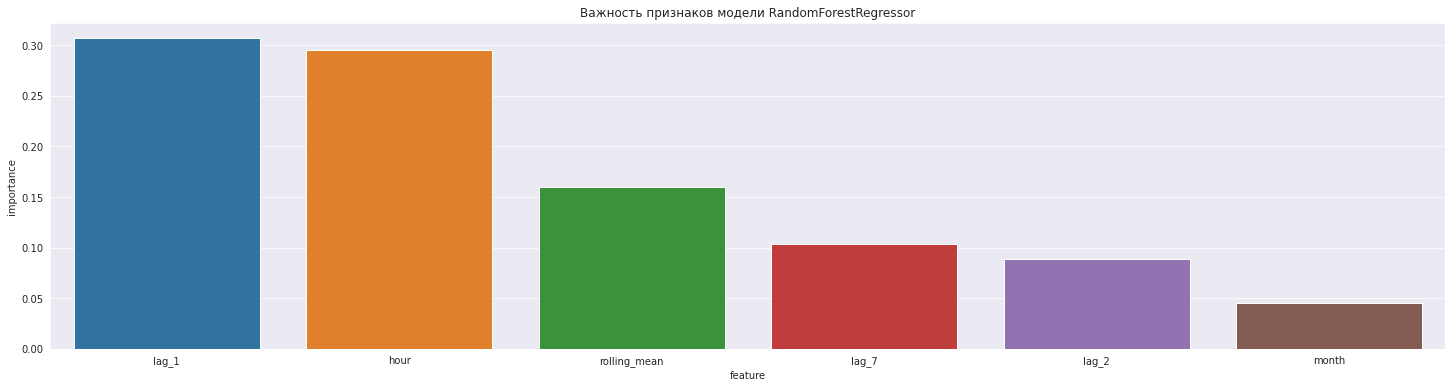

In [66]:
importance(grid_forest_imp.best_estimator_, features_train_imp, 'RandomForestRegressor')

#### CatBoostRegressor

In [67]:
model = CatBoostRegressor(loss_function="RMSE", verbose=100)
parametrs = {
    'iterations': [70, 200],
    'depth' : [8, 12],
    'grow_policy' : ['SymmetricTree', 'Lossguide']
}
grid_CBR_imp = GridSearchCV(model, parametrs, cv=my_cv, scoring=my_scorer)

In [68]:
grid_CBR_imp.fit(features_train_imp, target_train)
print(grid_CBR_imp.best_estimator_)

rmse_CBR_imp = grid_CBR_imp.best_score_* (-1)
print('CatBoostRegressor : RMSE = {:.2f}'.format(rmse_CBR_imp))

Learning rate set to 0.355047
0:	learn: 25.1587277	total: 3.43ms	remaining: 237ms
69:	learn: 7.9166843	total: 201ms	remaining: 0us
Learning rate set to 0.39614
0:	learn: 26.8532319	total: 3.85ms	remaining: 266ms
69:	learn: 10.4811683	total: 238ms	remaining: 0us
Learning rate set to 0.422349
0:	learn: 27.7322613	total: 4.46ms	remaining: 308ms
69:	learn: 12.7932549	total: 275ms	remaining: 0us
Learning rate set to 0.151222
0:	learn: 27.4328543	total: 3.61ms	remaining: 718ms
100:	learn: 10.4403059	total: 287ms	remaining: 281ms
199:	learn: 7.0413958	total: 581ms	remaining: 0us
Learning rate set to 0.168724
0:	learn: 29.6476346	total: 4.15ms	remaining: 825ms
100:	learn: 12.8823376	total: 348ms	remaining: 341ms
199:	learn: 9.5384514	total: 696ms	remaining: 0us
Learning rate set to 0.179887
0:	learn: 31.0708993	total: 4.84ms	remaining: 964ms
100:	learn: 14.7514605	total: 392ms	remaining: 385ms
199:	learn: 11.8228526	total: 780ms	remaining: 0us
Learning rate set to 0.355047
0:	learn: 24.9395095

feature  importance
0          hour       49.31
1         lag_1       12.64
2         lag_7       11.05
3         lag_2        9.39
4  rolling_mean        8.93

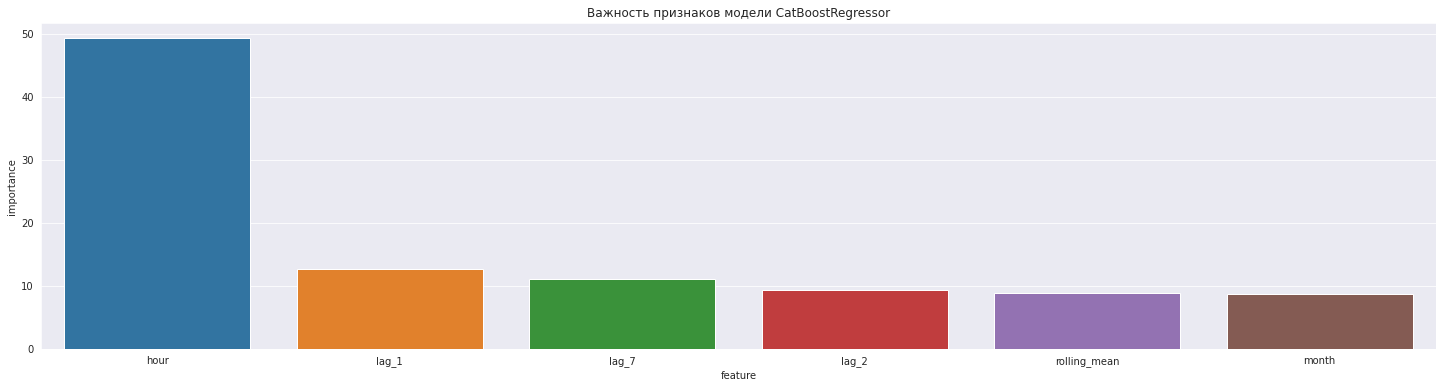

In [69]:
importance(grid_CBR_imp.best_estimator_, features_train_imp, 'CatBoostRegressor')

#### LGBMRegressor

In [70]:
model = LGBMRegressor(metric="rmse")
parametrs = {
    'n_estimators': [100, 200],
    'max_depth' : [8, 12],
}
grid_LGBM_imp = GridSearchCV(model, parametrs, cv=my_cv, scoring=my_scorer)

In [71]:
grid_LGBM_imp.fit(features_train_imp, target_train)
print(grid_LGBM_imp.best_estimator_)

rmse_LGBM_imp = grid_LGBM_imp.best_score_* (-1)
print('LGBMRegressor : RMSE = {:.2f}'.format(rmse_LGBM_imp))

LGBMRegressor(max_depth=8, metric='rmse')
LGBMRegressor : RMSE = 26.92


feature  importance
0          hour         627
1         lag_2         495
2         lag_1         465
3  rolling_mean         448
4         lag_7         422

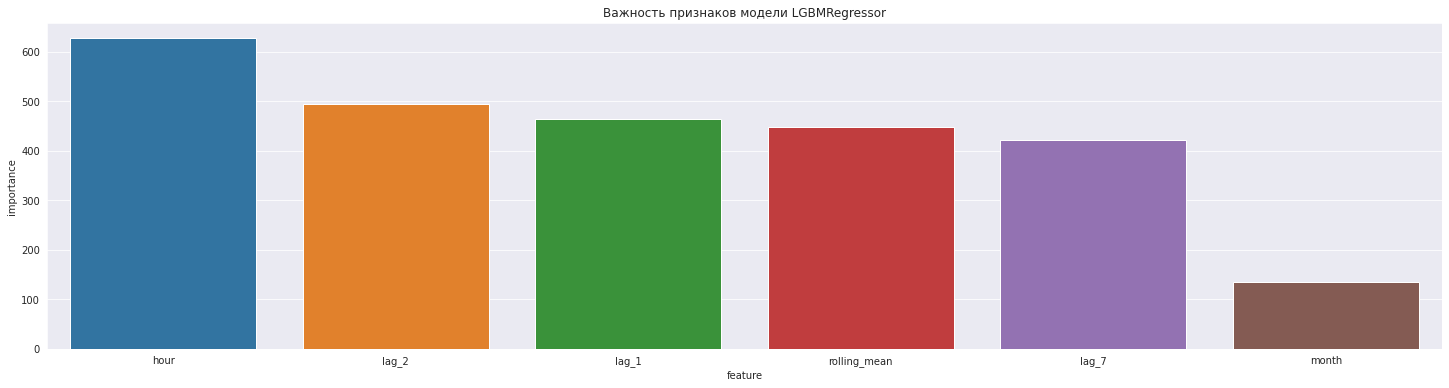

In [72]:
importance(grid_LGBM_imp.best_estimator_, features_train_imp, 'LGBMRegressor')

#### LinearRegression

In [73]:
model = LinearRegression()
parametrs = {
    'fit_intercept': ['True', 'False'],
    'normalize' : ['True', 'False'],
}
grid_LR_imp = GridSearchCV(model, parametrs, cv=my_cv, scoring=my_scorer)

In [74]:
grid_LR_imp.fit(features_train_imp, target_train)
print(grid_LR_imp.best_estimator_)

rmse_LR_imp = grid_LR_imp.best_score_* (-1)
print('LinearRegression : RMSE = {:.2f}'.format(rmse_LR_imp))

LinearRegression(fit_intercept='True', normalize='True')
LinearRegression : RMSE = 32.61


feature  importance
0         month        3.49
1         lag_1        0.43
2          hour        0.31
3  rolling_mean        0.18
4         lag_2        0.04

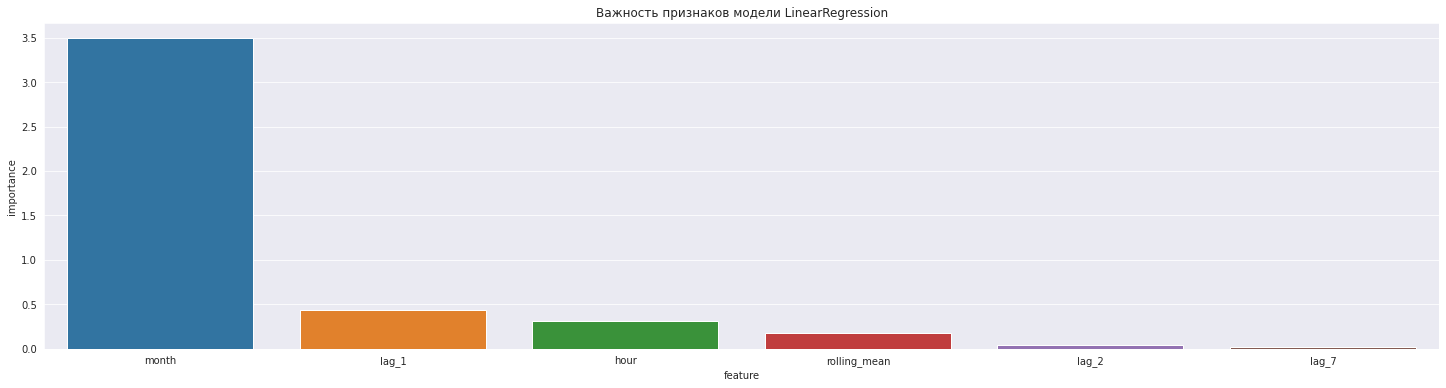

In [75]:
importance(grid_LR_imp.best_estimator_, features_train_imp, 'LinearRegression')

### Итоги

In [76]:
values_models = pd.DataFrame([
    ['RandomForestRegressor', rmse_RF, 'valid'],
    ['CatBoostRegressor',rmse_CBR, 'valid'],
    ['LGBMRegressor', rmse_LGBM, 'valid'],
    ['LinearRegression', rmse_LR, 'valid'],
    ['Dummy model', score_dummy, 'valid']
],
    columns=['Model', 'RMSE', 'Feature']
)

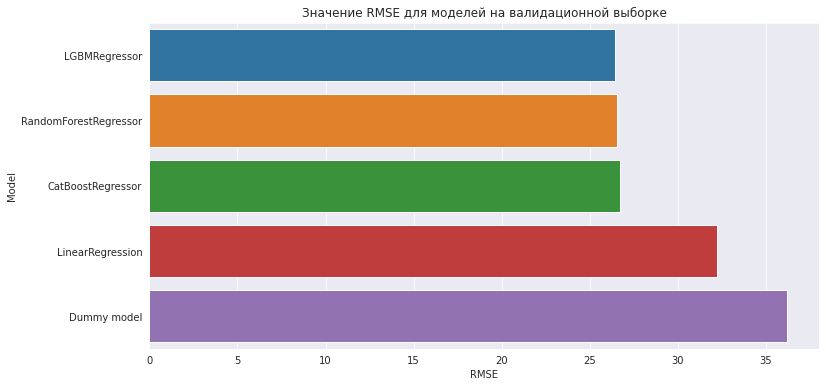

In [77]:
sort = values_models.sort_values(by='RMSE')

plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

sns.barplot(y=sort['Model'], x=sort['RMSE'])

plt.title('Значение RMSE для моделей на валидационной выборке')
plt.show()

In [78]:
values_models_imp = pd.DataFrame([
    ['RandomForestRegressor', rmse_RF_imp, 'important'],
    ['CatBoostRegressor',rmse_CBR_imp, 'important'],
    ['LGBMRegressor', rmse_LGBM_imp, 'important'],
    ['LinearRegression', rmse_LR_imp, 'important'],
    ['Dummy model', score_dummy,'important']
],
    columns=['Model', 'RMSE', 'Feature']
)

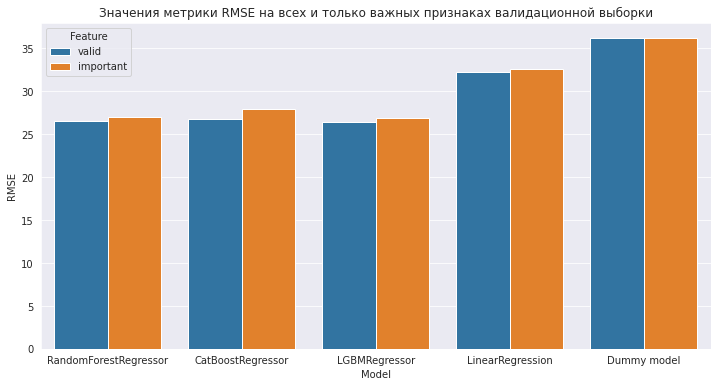

In [79]:
values = pd.concat(
    [values_models] + [values_models_imp]
)
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.barplot(x='Model', y='RMSE', data=values, hue='Feature')
plt.title('Значения метрики RMSE на всех и только важных признаках валидационной выборки')


plt.show()

In [80]:
valid = values_models[['Model', 'RMSE']].merge(
    values_models_imp[['Model', 'RMSE']], 
    on=['Model'], 
    how='left')
valid.set_axis(['Model', 'RMSE_valid', 'RMSE_important'], axis='columns', inplace=True)

valid

Model  RMSE_valid  RMSE_important
0  RandomForestRegressor       26.55           26.98
1      CatBoostRegressor       26.74           27.93
2          LGBMRegressor       26.42           26.92
3       LinearRegression       32.20           32.61
4            Dummy model       36.19           36.19

Значение метрики только на важных признаках незначительно, но все же ухудшилось у всех моделей, что свидетельствует о том, что маловажные призаки все-таки оказывают необходимое влияние на принятие решений моделью

## Тестирование

### RandomForestRegressor

In [81]:
predictions_test_RF = grid_forest.best_estimator_.predict(features_test)
rmse_test_RF = np.sqrt(mean_squared_error(target_test, predictions_test_RF))

print('Модель RandomForestRegressor (test): RMSE = {:.2f}'.format(rmse_test_RF))

Модель RandomForestRegressor (test): RMSE = 42.63


### CatBoostRegressor

In [82]:
predictions_test_CBR = grid_CBR.best_estimator_.predict(features_test)
rmse_test_CBR = np.sqrt(mean_squared_error(target_test, predictions_test_CBR))

print('Модель CatBoostRegressor (test): RMSE = {:.2f}'.format(rmse_test_CBR))

Модель CatBoostRegressor (test): RMSE = 41.48


### LGBMRegressor

In [83]:
predictions_test_LGBM = grid_LGBM.best_estimator_.predict(features_test)
rmse_test_LGBM = np.sqrt(mean_squared_error(target_test, predictions_test_LGBM))

print('Модель LGBMRegressor (test): RMSE = {:.2f}'.format(rmse_test_LGBM))

Модель LGBMRegressor (test): RMSE = 41.71


### LinearRegression

In [84]:
predictions_test_LR = grid_LR.best_estimator_.predict(features_test)
rmse_test_LR = np.sqrt(mean_squared_error(target_test, predictions_test_LR))

print('Модель LinearRegression (test): RMSE = {:.2f}'.format(rmse_test_LR))

Модель LinearRegression (test): RMSE = 51.07


### Dummy model

In [85]:
pred_previous_test = target_test.shift(periods = 1)
pred_previous_test[0] = target_train.iloc[-1]
score_dummy_test = np.sqrt(mean_squared_error(target_test, pred_previous_test))

print('Модель Dummy (test): RMSE = {:.2f}'.format(score_dummy_test))

Модель Dummy (test): RMSE = 58.88


### Итоги

Построим график целевых и предсказанных значений в разрезе моделей

In [86]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=target_test.index, y=target_test, name='Target_test', line=dict(color='#636EFA')))
fig.add_trace(go.Scatter(x=target_test.index, y=predictions_test_RF, name='RandomForestRegressor', line=dict(color='#00CC96', width=1)))
fig.add_trace(go.Scatter(x=target_test.index, y=predictions_test_CBR, name='CatBoostRegressor', line=dict(color='#19D3F3', width=1)))
fig.add_trace(go.Scatter(x=target_test.index, y=predictions_test_LGBM, name='LGBMRegressor', line=dict(color='#EF553B')))
fig.add_trace(go.Scatter(x=target_test.index, y=predictions_test_LR, name='LinearRegression', line=dict(color='#B6E880', width=1)))
fig.add_trace(go.Scatter(x=target_test.index, y=pred_previous_test, name='Dummy model', line=dict(color='#FECB52', width=1)))


fig.update_layout(
    title='Предсказания моделей',
#     xaxis_title='Модель',
    yaxis_title='Количество заказов',
    hovermode='x',
    legend_orientation="h",
    legend=dict(x=0, xanchor="left")
)
fig.update_traces(hoverinfo='all')
fig.show()

In [87]:
values_test = pd.DataFrame([
    ['RandomForestRegressor', rmse_test_RF, 'test'],
    ['CatBoostRegressor',rmse_test_CBR, 'test'],
    ['LGBMRegressor', rmse_test_LGBM, 'test'],
    ['LinearRegression', rmse_test_LR, 'test'],
    ['Dummy model', score_dummy_test,'test']
],
    columns=['Model', 'RMSE', 'Feature']
)

In [88]:
sort_test = values_test.sort_values(by='RMSE')
sort_test

Model  RMSE Feature
1      CatBoostRegressor 41.48    test
2          LGBMRegressor 41.71    test
0  RandomForestRegressor 42.63    test
3       LinearRegression 51.07    test
4            Dummy model 58.88    test

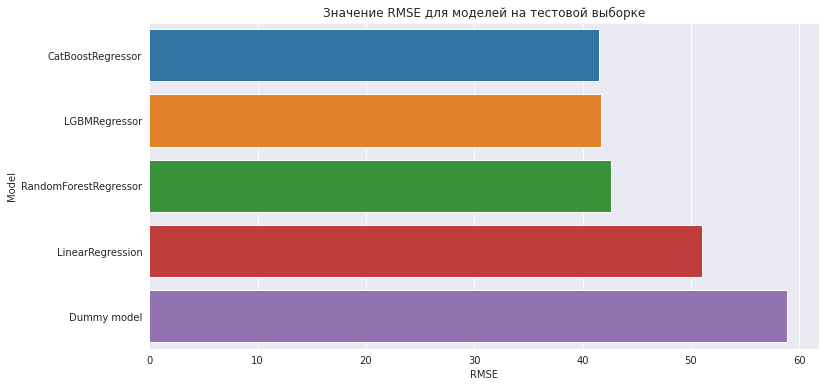

In [89]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

sns.barplot(y=sort_test['Model'], x=sort_test['RMSE'])

plt.title('Значение RMSE для моделей на тестовой выборке')
plt.show()

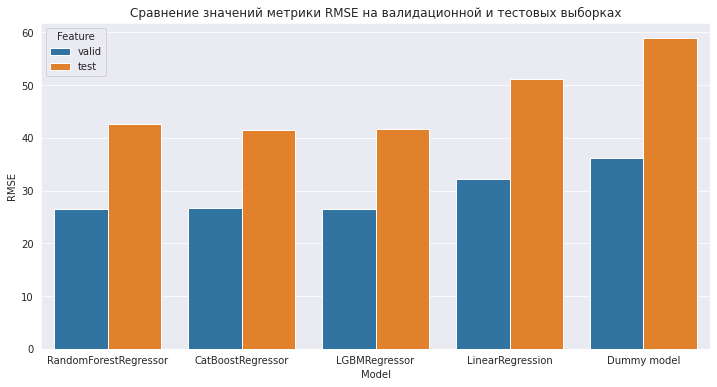

In [90]:
values = pd.concat(
    [values_models] + [values_test]
)
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.barplot(x='Model', y='RMSE', data=values, hue='Feature')
plt.title('Сравнение значений метрики RMSE на валидационной и тестовых выборках')


plt.show()

In [91]:
total = values_models[['Model', 'RMSE']].merge(values_test[['Model', 'RMSE']], on=['Model'], how='left')
total.set_axis(['Model', 'RMSE_valid', 'RMSE_test'], axis='columns', inplace=True)

total

Model  RMSE_valid  RMSE_test
0  RandomForestRegressor       26.55      42.63
1      CatBoostRegressor       26.74      41.48
2          LGBMRegressor       26.42      41.71
3       LinearRegression       32.20      51.07
4            Dummy model       36.19      58.88

### Общий вывод:
1. получили данные - временной ряд с количеством заказов такси в аэропорт с целью прогнозирования количество заказов такси на следующий час
2. выполнили почасовое семплирование, опредили тренд, выполнили сглаживание
3. при первичном взгляде на данные выявили зависимость кол-ва заказов от дня недели и времени суток
4. с помощью функции создали следующие признаки: календарные, остающие, скользящее среднее
5. привели данные к стационарному временному ряду
6. обучили модели: RandomForestRegressor,  CatBoostRegressor, LGBMRegressor, LinearRegression с метрикой RMSE.  
- Все модели на стационарном временном ряду показали метрику хуже, чем на исходных данных.   
- Также на примере моделей RandomForestRegressor, LGBMRegressor подбирали наилучшие показатели признаков (отстающих и скользящего среднего), что не улучшило метрику - оставило без изменений.  
- Подбор гиперпараметров осуществляли с помощью GridSearchCV.
7. лучший результат на валидационной выборке показала модель LGBMRegressor. Важность всех признаков модели учитывалась практически одинаково.
8. наиболее важными признаком трех моделей оказалось значение предыдущего часа в выборке и текущее время в сутках, в LinearRegression наиболее важным признаком из всех является месяц.
9. при обучении моделей только на наиболее важных признаках, значение метрики ухудшилось, но незначительно
9. наилучшее значение метрики на тестовой выборке показала модель CatBoostRegressor и совсем чуть хуже LGBMRegressor
